In [13]:
# When using the audio data directly as input without computing spectrograms:

import os
import tensorflow as tf
from tensorflow import keras 
from keras import layers

# Preprocessing 
# 1. Read wav file 
wavs_path = "AudioWAV"
wav_file = "1001_DFA_ANG_XX"
file = tf.io.read_file(os.path.join(wavs_path, wav_file) + ".wav")
print(file)


tf.Tensor(b'RIFF\x96\x1c\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00datar\x1c\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

Using spectrograms as input:

Loading the dataset

In [3]:
import os
import pandas as pd 

x = r"C:\Users\Jana S\.conda\envs\cv_env;C:\Users\Jana S\.conda\envs\cv_env\Library\mingw-w64\bin;C:\Users\Jana S\.conda\envs\cv_env\Library\usr\bin;C:\Users\Jana S\.conda\envs\cv_env\Library\bin;C:\Users\Jana S\.conda\envs\cv_env\Scripts;C:\Users\Jana S\.conda\envs\cv_env\bin;C:\ProgramData\Anaconda3\condabin;C:\Program Files\PlasticSCM5\server;C:\Program Files\PlasticSCM5\client;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files\dotnet;C:\Program Files\nodejs;C:\Program Files\Git\cmd;C:\Program Files\Git LFS;C:\Users\Jana S\AppData\Local\Microsoft\WindowsApps;C:\Users\Jana S\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\Jana S\.dotnet\tools;C:\Program Files\JetBrains\JetBrains Rider 2021.3.4\bin;.;C:\Users\Jana S\AppData\Local\GitHubDesktop\bin"
#os.add_dll_directory(x)

Crema_raw = "AudioWAV"

print(os.path.abspath(os.getcwd()))

crema_directory_list = os.listdir(Crema_raw)

sample_path = []
sample_emotion = []

for sample in crema_directory_list:
    # store path of current sample
    sample_path.append(Crema_raw + sample)
    # store emotion of current sample 
    split_name = sample.split('_')
    sample_emotion.append(split_name[2])

# store all paths with their respective emotion in a dataframe
emotion_df = pd.DataFrame(sample_emotion, columns=['Emotions'])
path_df = pd.DataFrame(sample_path, columns=['Path'])
crema_df = pd.concat([emotion_df, path_df], axis=1)
crema_df.head()

c:\Users\Jana S\Documents\Uni\Master\Salerno\Unterricht\SE4AI


,Emotions,Path
0,ANG,AudioWAV1001_DFA_ANG_XX.wav
1,DIS,AudioWAV1001_DFA_DIS_XX.wav
2,FEA,AudioWAV1001_DFA_FEA_XX.wav
3,HAP,AudioWAV1001_DFA_HAP_XX.wav
4,NEU,AudioWAV1001_DFA_NEU_XX.wav


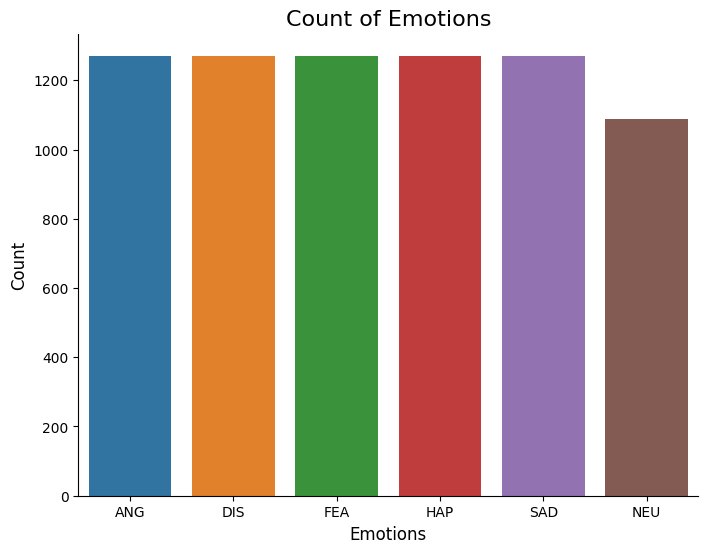

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title('Count of Emotions', size=16)
sns.barplot(x=crema_df.Emotions.value_counts().index, y=crema_df.Emotions.value_counts().values)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

Start building the model with one example first

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio waveform
# TODO: do it for all audio samples
wavs_path = "AudioWAV"
wav_file = "1001_DFA_ANG_XX"
audio_data, sr = librosa.load(os.path.join(wavs_path, wav_file) + ".wav", sr=None)

# Compute STFT magnitude
stft = librosa.stft(audio_data, n_fft=1024, hop_length=512) # gives us a 2D numpy array of the shape (n_freq_bins, n_time_frames)
stft_mag, stft_phase = librosa.magphase(stft)  # extracts the magnitudes and the phases and returns as separate matrices

# TODO: use stft_phase as input for CNN too by stacking it with the stft_mag along a third dimension
# stft_input = np.stack((stft_mag, stft_phase), axis=2)
# Add a 3D convolutional layer with 32 filters, a filter size of (3, 3, 3),
# and a stride of (1, 1, 1)
#model.add(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), padding='same', input_shape=(num_frames, num_bins, 2)))
# Add a 3D max pooling layer with a pool size of (2, 2, 2)
#model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# Convert to dB scale
stft_mag_db = librosa.amplitude_to_db(stft_mag, ref=np.max)


# Get input shape for neural network model
mag_spec = np.abs(stft_mag_db) 


# Plot spectrogram
fig, ax = plt.subplots()
img = librosa.display.specshow(stft_mag_db, y_axis='log', x_axis='time', ax=ax)
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")


AttributeError: module 'matplotlib' has no attribute 'axes'

<Figure size 640x480 with 0 Axes>

AttributeError: module 'matplotlib' has no attribute 'pyplot'

Building the model
Set up the model object 
The Sequential() class allows you to add layers to the model in sequence by automatically connecting them together. 

In [3]:
from tensorflow import keras 
from keras import layers

# Define the shape of the input spectrogram
# batch_size = None # the model should be able to deal with any size of batch
num_frequency_bins = len(mag_spec[0]) # spectrogram height
num_frames = len(mag_spec[1]) # spectrogram width
num_channels = 1 # how many features you have for each "cell" in the input matrix, like RGB pictures = 3 channels, spectrograms = 1 channel

input_shape = (num_frequency_bins, num_frames, num_channels)



Construct the layers


First the CNN part
Use a Conv2D layer since the input spectrograms are 2D representations of the audio signals.
Regarding the hyperparameters, a starting point is:
- number of filters: 32
- size of kernel: 3x3
- activation function: ELU

These can be adjusted depending on the complexity of the problem.
The number of filters is a trade-off between allowing the model to learn complex features and the prevention of overfitting. 
The size of the kernel is small enough to capture local patterns and features in the data while still being able to capture more global patterns as the network deepens. To capture more global patterns, a larger kernel size would be needed, but this also increases the number of parameters in the model. 
Compared to RELU (the commonly used activation function), ELU allows negative input values to have output values, which is relatively robust.

The next layer is a BatchNormalization layer with the 
Parameters: 
- axis = 3, to normalize along the feature axis
- momentum = 0.9, for the moving average of the batch statistics

Keras automatically applies the batch normalization to the output of the convolutional layer before applying the activation function. 

The next layer is a MaxPooling2D layer with the parameter:
- pool_size = (2,2), which means that the feature maps are down-sampled by a factor of 2 in both the vertical and horizontal directions. This is a common choice for pooling windows in CNNs, as it can help to reduce the spatial dimensions of the feature maps while preserving important features.

In [4]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', input_shape=input_shape))
model.add(layers.BatchNormalization(axis=3, momentum=0.9))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

The next step is to add the LSTM layers
- 64 units as hyperparameter is a good starting point that can be tuned during training later 
    This is a relatively small number of units, which may be appropriate for simpler problems or smaller datasets. However, for more complex problems or larger datasets, increasing the number of units may be necessary to achieve good performance.
    In general, a larger number of units can help the model learn more complex patterns in the data, but may also require more computational resources and increase the risk of overfitting.

- tanh activation function 
    The activation function used in the LSTM layer is typically the hyperbolic tangent (tanh) function. The tanh function maps the input values to a range between -1 and 1, which helps to prevent the gradients from vanishing or exploding during backpropagation.

In [5]:
# Add layers to convert the output of the CNN part to a shape that the LSTM layer can take as input
model.add(layers.Flatten())
time_steps = 858 # hyperparameter to tune
model.add(layers.Reshape((time_steps, -1)))
# LSTM
model.add(layers.LSTM(64, activation='tanh'))

ValueError: Exception encountered when calling layer "reshape" (type Reshape).

total size of new array must be unchanged, input_shape = [39200], output_shape = [858, -1]

Call arguments received by layer "reshape" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 39200), dtype=float32)

After that, the fully connected layers are added, also called dense layers. 
The purpose of the dense layers is to learn non-linear relationships between the features extracted by the convolutional and recurrent layers.

In [ ]:
model.add(layers.Dense(units=32, activation='elu'))
model.add(layers.Dense(units=4, activation='softmax'))

As a last step, the model needs to be compiled. In Keras, before training a model, we need to compile it by specifying the loss function, the optimizer, and any evaluation metrics that we want to use.

In [ ]:
from keras import optimizers

opt = optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Check the model structure

In [ ]:
model.summary()